<a href="https://colab.research.google.com/github/YannickDuport/PhyInf/blob/main/Yannick_Duport_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

Preprocessing includes i) installing Python packages, ii) creating empty directories and iii) cloning git repositories and compiling Seq-Gen

## Install Python Packages

* Biopython
* numpy (version 1.21.1)


In [ ]:
!pip install Biopython
!pip install -U numpy
!pip install -U ray
!pip install -U xarray
#!pip install -U scikit-learn

     |████████████████████████████████| 2.3 MB 25.5 MB/s 
     |████████████████████████████████| 15.7 MB 14.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 57.6 MB 1.2 MB/s 
     |████████████████████████████████| 173 kB 35.3 MB/s 
     |████████████████████████████████| 845 kB 22.4 MB/s 
  Attempting uninstall: xarray
    Found existing installation: xarray 0.18.2
    Uninstalling xarray-0.18.2:
      Successfully uninstalled xarray-0.18.2


## Create Directory Structure

In [ ]:
from pathlib import Path

ROOT_PATH = Path('/content/')
REPO_PATH = ROOT_PATH / "repos"         # contains all git repositories
BASH_PATH = ROOT_PATH / "bash_scripts"  # contains bash-scripts (e.g. for sequence generation)
DATA_PATH = ROOT_PATH / "data"          # contains all data used (models, sequences)
TREE_PATH = DATA_PATH / "trees"         # contains all trees downloaded from RAxMLGrove
SEQ_PATH = DATA_PATH / "sequences"      # contains all sequences, generated from the downloaded trees & models
RESULTS_PATH = ROOT_PATH / "results"    # contains results (plots, etc.)

PATHS = [
  ROOT_PATH,
  REPO_PATH,
  BASH_PATH,
  DATA_PATH,
  TREE_PATH,
  SEQ_PATH,
  RESULTS_PATH
]

for path in PATHS:
  path.mkdir(exist_ok=True)

## Clone Git Repositories

* RAxMLGroveScripts - Download Trees
* Seq-Gen - Generate Sequences
* PhyInf - Personal repository that contains some intermediate files, such as a binary file containing all distance matrices

In [ ]:
!git clone https://github.com/angtft/RAxMLGroveScripts /content/repos/RAxMLGroveScripts
!git clone https://github.com/rambaut/Seq-Gen /content/repos/Seq-Gen
!git clone https://github.com/YannickDuport/PhyInf /content/repos/PhyInf

fatal: destination path '/content/repos/PhyInf' already exists and is not an empty directory.


## Compile Seq-Gen

In [ ]:
!cd /content/repos/Seq-Gen/source; make

cc  -O3 -c seq-gen.c 
seq-gen.c: In function ‘OpenTreeFile’:
seq-gen.c:690:4: warning: ignoring return value of ‘fgets’, declared with attribute warn_unused_result [-Wunused-result]
    fgets(st, 255, stdin);
    ^~~~~~~~~~~~~~~~~~~~~
seq-gen.c: In function ‘ReadFileParams’:
seq-gen.c:584:3: warning: ignoring return value of ‘fgets’, declared with attribute warn_unused_result [-Wunused-result]
   fgets(st, 255, tree_fv);
   ^~~~~~~~~~~~~~~~~~~~~~~
cc  -O3 -c global.c
cc  -O3 -c evolve.c
cc  -O3 -c model.c
cc  -O3 -c nucmodels.c
cc  -O3 -c aamodels.c
cc  -O3 -c eigen.c
eigen.c:38:9: warning: conflicting types for built-in function ‘cexp’ [-Wbuiltin-declaration-mismatch]
 complex cexp (complex a);
         ^~~~
cc  -O3 -c treefile.c
cc  -O3 -c progress.c
cc  -O3 -c gamma.c
cc  -O3 -c twister.c
cc  -O3 -o seq-gen seq-gen.o global.o evolve.o model.o nucmodels.o aamodels.o eigen.o treefile.o progress.o gamma.o twister.o -lm


In [ ]:
# import shutil
# shutil.rmtree(r'/content/data/')
# DATA_PATH.mkdir(exist_ok=True)
# SEQ_PATH.mkdir(exist_ok=True)

# Download Trees

This section includes i) downloading trees and ii) creating some statistics of the downloaded trees **(currently missing)**.

Trees are being downloaded using the script 'org_script.py', provided by RAxMLGroveScripts.

Trees will be downloaded into: /content/data/trees

Filters used are:
* MODEL = GTR
* DATA_TYPE = DNA
* NUM_TAXA <= 1000
* OVERALL_NUM_PARTITIONS = 1

In [ ]:
!printf 'y\n100' | /content/repos/RAxMLGroveScripts/org_script.py --seed 42 find -q "MODEL = 'GTR' and DATA_TYPE = 'DNA' and OVERALL_NUM_PARTITIONS = '1' and NUM_TAXA <= 1000" -o /content/data/trees

{'TREE_ID': '3183', 'NUM_TAXA': 302, 'TREE_LENGTH': 3.47807, 'TREE_DIAMETER': 1.35388, 'TREE_HEIGHT': 0.982898, 'BRANCH_LENGTH_MEAN': 0.005787130498555144, 'BRANCH_LENGTH_VARIANCE': 0.001493673645549527, 'IS_INDELIBLE_COMPATIBLE': 0, 'OVERALL_NUM_ALIGNMENT_SITES': 560, 'OVERALL_NUM_PATTERNS': 296, 'OVERALL_GAPS': 2.64, 'INVARIANT_SITES': 'None', 'RAXML_NG': 0, 'OVERALL_NUM_PARTITIONS': 1, 'MISSING_DATA_RATE': 'None', 'MODEL': 'GTR', 'ALPHA': 0.283225, 'RATE_AC': 3.685461, 'RATE_AG': 26.846964, 'RATE_AT': 2.341218, 'RATE_CG': 1.779448, 'RATE_CT': 32.821458, 'RATE_GT': 1.0, 'FREQ_A': 0.383854, 'FREQ_C': 0.154459, 'FREQ_G': 0.169654, 'FREQ_T': 0.292034, 'NUM_ALIGNMENT_SITES': 560, 'NUM_PATTERNS': 296, 'GAPS': 2.64, 'DATA_TYPE': 'DNA', 'RATE_STR': 'GTR{3.685461/26.846964/2.341218/1.779448/32.821458/1.0}', 'FREQ_STR': '{0.383854/0.154459/0.169654/0.292034}', 'PARTITION_NUM': 'None', 'STATIONARY_FREQ_STR': 'None', 'PROPORTION_INVARIANT_SITES_STR': 'None', 'AMONG_SITE_RATE_HETEROGENEITY_STR':

In [ ]:
import json

import pandas as pd
import matplotlib.pyplot as plt

from pathlib import PosixPath

def read_tree_stats(path: PosixPath) -> pd.DataFrame :
    """ The methods reads in the json files of each tree, collects some stats 
    and stores them in a pandas data frame 
    """

    # Dictionary to collect all the stats
    stats_dicti = {
        'TREE_ID': [],
        'NUM_TAXA': [], 
        'BRANCH_LENGTH_MEAN': []
    }

    # list all json files containing the tree stats
    tree_files = path.rglob("tree_dict.json")

    # read json files and add some of the stats to the dictionary
    for tree_file in tree_files:
        with tree_file.open('r') as f:
            stats = json.load(f)[0]

            # append stats to the stats dictionary
            for key, values in stats_dicti.items():
                values.append(stats[key])
    
    return pd.DataFrame(stats_dicti)


def plot_tree_stats(df: pd.DataFrame):

    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].hist(df['NUM_TAXA'], density=True, bins=20)
    axes[1].hist(df['BRANCH_LENGTH_MEAN'], density=True, bins=25)
    axes[1].set_yscale('log')
    fig.show()

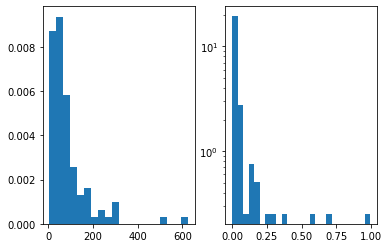

In [ ]:
x = read_tree_stats(TREE_PATH)
plot_tree_stats(x)

# Generate Sequences

In [ ]:
###  CREATE BASH-SCRIPT TO GENERATE SEQUENCES  ###

# write bash code as a string
sh = """#!/bin/bash

# usage: ./generate_sequences.sh <PATH_TO_DATA> <PATH_TO_OUTDIR> <SEQUENCE_LENGTHS> <PATH_TO_SEQGEN>
# SEQUENCE_LENGTHS should be comma separated. E.g. 10,100,1000
# PATH_TO_SEQGEN is the path to the Seq-Gen repository

PATH_TO_DATA=$1
PATH_TO_OUTDIR=$2
IFS=',' read -ra SEQ_LENGTHS <<< $3
PATH_TO_SEQGEN=$4
MODEL="GTR"
SEED=100

for filename in $PATH_TO_DATA/*/; do

  # Set tree and parameter files
  TREE_ID=$(basename $filename)
  TREE_FILE="${filename}tree_best.newick"
  MODEL_FILE="${filename}log_0.txt"

  # Get model parameters
  while read line; do
    IFS=':' read -ra ADDR <<< $line
      if [[ ${ADDR[0]} == "rate A <-> C" ]]; then
        RATE_A_C=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "rate A <-> G" ]]; then
        RATE_A_G=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "rate A <-> T" ]]; then
        RATE_A_T=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "rate C <-> G" ]]; then
        RATE_C_G=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "rate C <-> T" ]]; then
        RATE_C_T=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "rate G <-> T" ]]; then
        RATE_G_T=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "freq pi(A)" ]]; then
        PI_A=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "freq pi(C)" ]]; then
        PI_C=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "freq pi(G)" ]]; then
        PI_G=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "freq pi(T)" ]]; then
        PI_T=$(echo ${ADDR[1]} | xargs)
      fi
  done < $MODEL_FILE

  # Generate and run seq-gen command
  SEQ_PATH="${PATH_TO_OUTDIR}/${TREE_ID}"
  mkdir -p ${SEQ_PATH}
  echo "GENERATE SEQUENCES FOR MODEL ${TREE_ID} OF SIZES $3 bases"
  echo "GENERATED SEQUENCES CAN BE FOUND UNDER ${SEQ_PATH}"
  echo ""
  for SEQ_LEN in "${SEQ_LENGTHS[@]}"; do
    OUTFILE="${SEQ_PATH}/seq_${SEQ_LEN}.fasta"
    GENERATE_SEQ="${PATH_TO_SEQGEN}/source/seq-gen -q -z $SEED -of -m $MODEL -l $SEQ_LEN -f $PI_A,$PI_C,$PI_G,$PI_T -r $RATE_A_C,$RATE_A_G,$RATE_A_T,$RATE_C_G,$RATE_C_T,$RATE_G_T < $TREE_FILE > ${OUTFILE}"
    eval $GENERATE_SEQ
  done
done
"""

# write "bash-string" to file
bash_file = BASH_PATH / "generate_sequences.sh"
with bash_file.open('w') as bs:
  bs.write(sh)

# give execution rights
!chmod 755 /content/bash_scripts/generate_sequences.sh

In [ ]:
!/content/bash_scripts/generate_sequences.sh /content/data/trees/ /content/data/sequences/ 100,200,500,1000 /content/repos/Seq-Gen/

GENERATE SEQUENCES FOR MODEL 10329 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//10329

GENERATE SEQUENCES FOR MODEL 10832 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//10832

GENERATE SEQUENCES FOR MODEL 12436 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//12436

GENERATE SEQUENCES FOR MODEL 12984 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//12984

GENERATE SEQUENCES FOR MODEL 13392 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//13392

GENERATE SEQUENCES FOR MODEL 13682 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//13682

GENERATE SEQUENCES FOR MODEL 14049 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//14049

GENERATE SEQUENCES FOR MODEL 14326

# Create MST

## Import packages and define functions

In [ ]:
import pickle
import ray
import time

import numpy as np
import networkx as nx
import xarray as xr

from Bio import SeqIO
from pathlib import Path
from networkx.algorithms.tree.mst import minimum_spanning_tree
from sklearn.metrics.pairwise import pairwise_distances

# typing
from pathlib import PosixPath
from typing import Union, List
from numpy.typing import NDArray

In [ ]:
###  HELPER FUNCTIONS  ###

def timeit(method):
    """Timing decorator"""

    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()

        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('{:20}  {:8.4f} [s]'.format(method.__name__, (te - ts)))
        return result

    return timed

In [ ]:
class DistanceMatrixCollection:
    """ A container to store distance matrices.
        Distance matrices are stored in a dictionary where keys TreeIDs and values are xarrays
        The xarray object contains the distances matrices and, lengths and names of the sequences from which the distance matrices were computed.
        I.e. dimensions of the xarray are: (i) seq_lenght, (ii) taxa_names (row), (iii) taxa_names (col)
              DataArray of the xarray contains: Distance matrices 

        It is possible to compute new distance matrices (from new models, new sequences, etc.) and add them to the existing dictionary.
        It is also possible to store the whole object in a binary file.
        This way we don't have to compute all distance matrices in one go and have a simple structure to easily access them at a later timepoint.
        """
    
    def __init__(self):
        """ Initiates a distance_matrix_collection object
        """
        self.distance_matrices = None
        self.ids = None


    def __compute_jc_distance(self, seq1, seq2, seq_len):
        """ Computes the jukes-cantor distance between two sequences
            If the hamming distance is too large (i.e. >= 0.75) the functions returns infinity
        """
        # compute hamming distance between seq1 and seq2
        hamming_dist = sum(ch1 != ch2 for ch1, ch2 in zip(seq1, seq2)) / seq_len

        # compute jc corrected distance
        if hamming_dist >= 0.75:
          return np.inf
        else:
          return -3/4 * np.log(1 - 4/3 * hamming_dist)


    def compute_distance_matrix(self, fasta: PosixPath, save: bool = False):
        """ Reads a fasta file and computes the pairwise jukes-cantor distance between the sequences
        If wanted, a tuple of sequence names and distance matrix (seq_names, distance_matrix) can be saved as binary file.
        The file will be called 'distance_matrix.bin' and stored at the same location as the fasta file.

        :param fasta: path to the fasta file
        :param save: set to True if you want to save the distance matrix
        :return: <(seq_names, distance_matrix)>
        """
        # get sequences and sequence names from the provided fasta file
        seq_names = []
        sequences = []
        for record in SeqIO.parse(fasta, 'fasta'):
            seq_names.append(record.id)
            sequences.append(record.seq)

        # compute the distance matrix from the sequences(jc distance)
        n_taxa = len(seq_names)
        seq_length = len(sequences[0])
        distance_matrix = np.zeros(shape=(n_taxa, n_taxa))

        # iterate over each pair of sequences, compute jc-distance and fill matrix
        for i, seq1 in enumerate(sequences[:-1]):
            for j, seq2 in enumerate(sequences[i+1:]):
                jc_dist = self.__compute_jc_distance(seq1, seq2, seq_length)
                distance_matrix[[i, j+i+1], [j+i+1, i]] = jc_dist

        return seq_names, distance_matrix


    @timeit
    def compute_all_distance_matrices(self, path: PosixPath, n_nodes: int=10, create_new: bool=True):
        # add option to compute only subset of files in path (e.g. by passing a list of ids, passing a length, certain sequence lengths, etc)
        """ Computes distances matrices for all sequences in 'path' in parallel. 
        Each node computes distance matrices for a subdirectory (corresponds to a tree_id). 
        Number of distance matrices depends on the number of sequence file in the directory.
        Once all distance matrices are computed, they are stored in the 'distance_matrices' attribute.

        The passed path should have the following structure:
            -seq_path
                - subdir1
                    - seqfile_1.fasta
                    ...
                    - seqfile_n.fasta
                - subdir2
                    ...
                ...
        The names of the subdirectories should be named after the Tree IDs used to create the sequences

        The method either overwrites the previous object stored in the distance_matrices attributes (create_new=True), 
        or appends them to the existing one (create_new=False)
    
        :param n_nodes: Number of nodes
        :param create_new: Set to 'False' if you want to add the newly computed distance matrices to the already existing 'distance_matrices' attribute
        """

        # get path to all subdirectories
        model_paths = sorted([dir for dir in path.iterdir() if dir.is_dir()])

        # initialize ray
        ray.init(num_cpus=n_nodes, ignore_reinit_error=True)

        # compute distance matrices (parallelized)
        outputs = []
        for path in model_paths[:5]:
          outputs.append(self.__compute_all_distance_matrices_wrapper.remote(self, path=path))

        # get the remote object
        # creates list of tuples containing the Tree_ID, Sequence_lengths, distance matrices and Sequence_names
        out = ray.get(outputs)

        # shutdown ray
        ray.shutdown()


        # convert the output to a dictionary and store in the distance_matrices attribute
        dmatrix_dicti = self.__create_dmatrix_dicti(out)

        if create_new:
            self.distance_matrices = dmatrix_dicti
        else:
            for key, value in dmatrix_dicti.items():
                if key not in self.ids:
                    self.distance_matrices[key] = value
                else:
                    pass
                    #FIXME: add case the id already exists.
                    # -> check if sequences lenghts were already computed 
                    #     -> if yes replace old with new distance matrix and print out warning
                    #     -> if not, add addidional slice

        # store all ids
        self.ids = list(self.distance_matrices.keys())



    def get_dmatrix(self, id, seq_length):
        """ Returns the distance matrix corresponding to the given id and sequence length """

        if self.distance_matrices is None:
            raise ValueError("")
        if id not in self.distance_matrices.keys():
            raise ValueError(f"id {id} is not in self.distance_matrices. Choose one of the following IDs: {self.distance_matrices.keys()}")
        if seq_length not in self.distance_matrices[id].coords['seq_length']:
            raise ValueError(f"No distance matrix for seq_length {seq_length} exists. Choose one of the following sequence lengths: {self.distance_matrices[id].coords['seq_length']} ")

        return self.distance_matrices[id].sel(seq_length=seq_length).to_numpy()


    def save(self, filepath: PosixPath):
        """ Stores the object in a binary file, using pickle """
        pickle.dump(self, filepath.open('wb'))


    @ray.remote
    @timeit
    def __compute_all_distance_matrices_wrapper(self, path: PosixPath):
        """ Computes distance matrices from all fasta files in a given path """

        model_name = path.name
        print(f"Compute distance matrices for model {model_name}")

        seq_lengths = []
        distance_matrices = []
        fasta_files = path.rglob(r"seq*.fasta")
        for f in fasta_files:
            seq_lengths.append(f.name.split('.')[0].split('_')[1])
            seq_names, distance_matrix = self.compute_distance_matrix(fasta=f)
            distance_matrices.append(distance_matrix)

        return model_name, seq_lengths, distance_matrices, seq_names

    
    def __create_dmatrix_dicti(self, ray_output) -> dict:
        """ Creates a dictionary where keys are 'tree_ids' and values are xarray objects

            The xarray object contains the distances matrices and, lengths and names of the sequences from which the distance matrices were derived.
            I.e. dimensions of the xarray are: (i) seq_lenght, (ii) taxa_names (row), (iii) taxa_names (col)
                 DataArray of the xarray contains: Distance matrices """
        
        out_dicti = {}
        for result in ray_output:
            tree_id = result[0]
            seq_len = np.array(result[1], dtype=int)
            d_matrix = result[2]
            t_names = result[3]
            out_dicti[tree_id] = xr.DataArray(d_matrix, coords=[seq_len, t_names, t_names], dims=['seq_length', 'taxon_names_row', 'taxon_names_col'])

        return out_dicti


In [ ]:
dmc = DistanceMatrixCollection()
ray.shutdown()
dmc.compute_all_distance_matrices(SEQ_PATH, n_nodes=10)

(timed pid=9469) Compute distance matrices for model 10329
(timed pid=9468) Compute distance matrices for model 10832
(timed pid=9535) Compute distance matrices for model 12984
(timed pid=9536) Compute distance matrices for model 12436
(timed pid=9594) Compute distance matrices for model 13392
(timed pid=9468) __compute_all_distance_matrices_wrapper    5.9513 [s]
(timed pid=9536) __compute_all_distance_matrices_wrapper    3.3687 [s]
(timed pid=9594) __compute_all_distance_matrices_wrapper   11.8097 [s]
(timed pid=9469) __compute_all_distance_matrices_wrapper   20.7184 [s]
compute_all_distance_matrices   33.0617 [s]


In [ ]:
list(dmc.ids)
dmc.get_dmatrix(id='10329', seq_length=500)

array([[0.        , 0.04960485, 0.05820093, ..., 0.0202715 , 0.02439239,
        0.00602413],
       [0.04960485, 0.        , 0.04110618, ..., 0.06689668, 0.06908647,
        0.05174465],
       [0.05820093, 0.04110618, 0.        , ..., 0.07569444, 0.0779101 ,
        0.06036544],
       ...,
       [0.0202715 , 0.06689668, 0.07569444, ..., 0.        , 0.01617313,
        0.02232912],
       [0.02439239, 0.06908647, 0.0779101 , ..., 0.01617313, 0.        ,
        0.02646136],
       [0.00602413, 0.05174465, 0.06036544, ..., 0.02232912, 0.02646136,
        0.        ]])

In [ ]:
outpath = DATA_PATH / 'test.bin'
dmc.save(outpath)

In [ ]:
class MST:

    def __init__(self, id, vertex_names, distance_matrix):
        self.id = id
        self.graph = self.__create_fully_connected_graph(id=id, names=vertex_names, dmatrix=)
        self.mst = None

    




['10329', '10832', '12436', '12984', '13392']
{'10329': <xarray.DataArray (seq_length: 4, taxon_names_row: 85, taxon_names_col: 85)>
array([[[ 0.        ,  0.05174465,  0.04110618, ...,  0.0306165 ,
          0.04110618,  0.00501674],
        [ 0.05174465,  0.        ,  0.05174465, ...,  0.08459662,
          0.09587503,  0.05712102],
        [ 0.04110618,  0.05174465,  0.        , ...,  0.07348531,
          0.08459662,  0.04640655],
        ...,
        [ 0.0306165 ,  0.08459662,  0.07348531, ...,  0.        ,
          0.01006727,  0.035843  ],
        [ 0.04110618,  0.09587503,  0.08459662, ...,  0.01006727,
          0.        ,  0.04640655],
        [ 0.00501674,  0.05712102,  0.04640655, ...,  0.035843  ,
          0.04640655,  0.        ]],

       [[ 0.        ,  0.0202715 ,  0.05174465, ...,  0.01006727,
         -0.        , -0.        ],
        [ 0.0202715 ,  0.        ,  0.0306165 , ...,  0.0306165 ,
          0.0202715 ,  0.0202715 ],
        [ 0.05174465,  0.0306165 ,  

In [ ]:
out_dicti['10329'].sel(seq_length='100').to_numpy()


array([[ 0.        ,  0.0202715 ,  0.05174465, ...,  0.01006727,
        -0.        , -0.        ],
       [ 0.0202715 ,  0.        ,  0.0306165 , ...,  0.0306165 ,
         0.0202715 ,  0.0202715 ],
       [ 0.05174465,  0.0306165 ,  0.        , ...,  0.06253621,
         0.05174465,  0.05174465],
       ...,
       [ 0.01006727,  0.0306165 ,  0.06253621, ...,  0.        ,
         0.01006727,  0.01006727],
       [-0.        ,  0.0202715 ,  0.05174465, ...,  0.01006727,
         0.        , -0.        ],
       [-0.        ,  0.0202715 ,  0.05174465, ...,  0.01006727,
        -0.        ,  0.        ]])

## Create MST from sequences